In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\ACER\Downloads\archive\IRIS.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

3

In [8]:
df.drop_duplicates(inplace = True)

<Axes: >

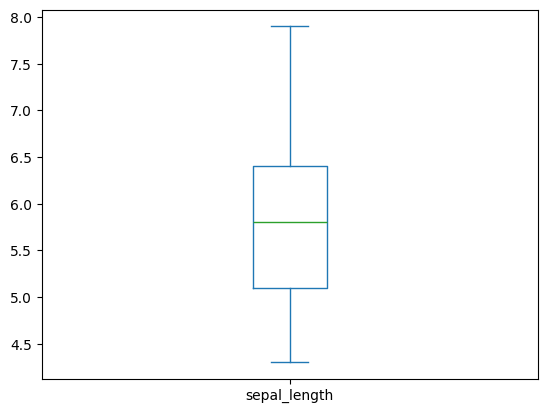

In [9]:
df["sepal_length"].plot.box()

<Axes: >

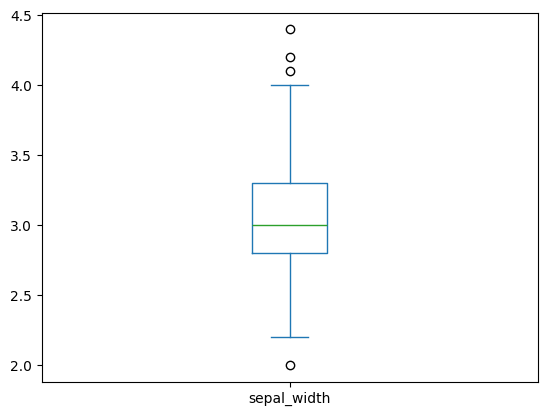

In [10]:
df["sepal_width"].plot.box()

<Axes: >

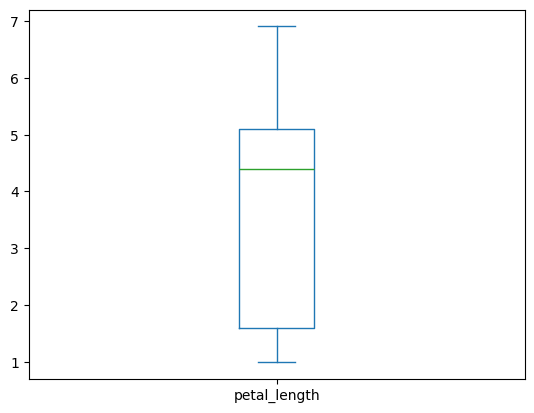

In [11]:
df["petal_length"].plot.box()

<Axes: >

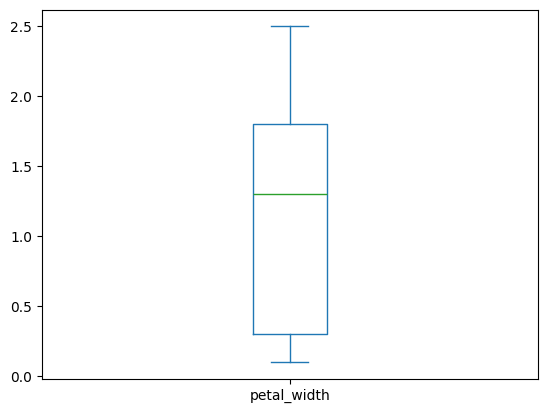

In [12]:
df["petal_width"].plot.box()

In [13]:
df["species"].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [14]:
df["species"] = df["species"].map({"Iris-versicolor":0,"Iris-virginica":1,"Iris-setosa":2})

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [16]:
x = df.drop("species",axis =1)
y = df["species"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,train_size = 0.75,random_state = 23)

In [20]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,f1_score,precision_score


### Logistic Regression

In [21]:
log = LogisticRegression()
log.fit(x_tr,y_tr)

LogisticRegression()

In [22]:
log.score(x_tr,y_tr)

0.9727272727272728

In [23]:
y_pred = log.predict(x_te)

In [24]:
accuracy_score(y_te,y_pred)

0.972972972972973

### Decision tree 

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [26]:
dt.score(x_tr,y_tr)

1.0

In [27]:
y_pred1 = dt.predict(x_te)

In [28]:
accuracy_score(y_te,y_pred1)

0.9459459459459459

### kneighbours classifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_tr,y_tr)

KNeighborsClassifier()

In [32]:
knn.score(x_tr,y_tr)

0.9636363636363636

In [33]:
y_pred2 = knn.predict(x_te)

In [34]:
accuracy_score(y_te,y_pred2)

1.0

### svc linear

In [35]:
lsvc = SVC(kernel = "linear")
lsvc.fit(x_tr,y_tr)

SVC(kernel='linear')

In [36]:
lsvc.score(x_tr,y_tr)

0.9818181818181818

In [37]:
y_pred3 = lsvc.predict(x_te)

In [38]:
accuracy_score(y_te,y_pred3)

1.0

### scv poly

In [39]:
psvc = SVC(kernel = "poly")
psvc.fit(x_tr,y_tr)

SVC(kernel='poly')

In [40]:
psvc.score(x_tr,y_tr)

0.9727272727272728

In [41]:
y_pred4 = psvc.predict(x_te)

In [42]:
accuracy_score(y_te,y_pred4)

0.972972972972973

### svc rbf

In [43]:
rsvc = SVC(kernel = "rbf")

In [44]:
rsvc.fit(x_tr,y_tr)

SVC()

In [45]:
rsvc.score(x_tr,y_tr)

0.9545454545454546

In [46]:
y_pred5 = rsvc.predict(x_te)

In [47]:
accuracy_score(y_te,y_pred5)

0.972972972972973

### Random forest Classifier

In [49]:
rf = RandomForestClassifier(n_estimators = 150,n_jobs = -1)

In [50]:
rf.fit(x_tr,y_tr)

RandomForestClassifier(n_estimators=150, n_jobs=-1)

In [51]:
rf.score(x_tr,y_tr)

1.0

In [52]:
y_pred6 = rf.predict(x_te)

In [54]:
accuracy_score(y_te,y_pred6)

0.9459459459459459

### Adaboost classifier in decision tree classifier

In [55]:
ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=150)

In [56]:
ab.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=150)

In [57]:
ab.score(x_tr,y_tr)

1.0

In [58]:
y_pred7 = ab.predict(x_te)

In [59]:
accuracy_score(y_te,y_pred7)

0.9459459459459459

### svc linear model is perfectly fit for these data